In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [30]:
df = pd.read_csv('spam.csv')

In [31]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Group spam and ham msg

In [33]:
spam_data = df[df['v1'] == 'spam']
ham_data = df[df['v1'] == 'ham']

In [34]:
spam_data

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [35]:
ham_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [37]:
def count_words(v2):
    words = v2.split()
    return len(words)


In [45]:
df['word_count'] = df['v2'].apply(len)

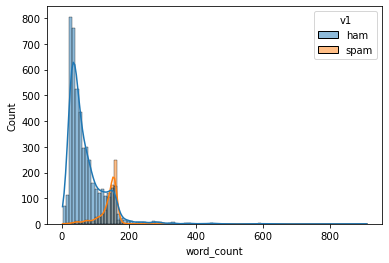

In [47]:
sns.histplot(data=df, x='word_count', hue='v1', kde=True, alpha=0.5)
plt.show()

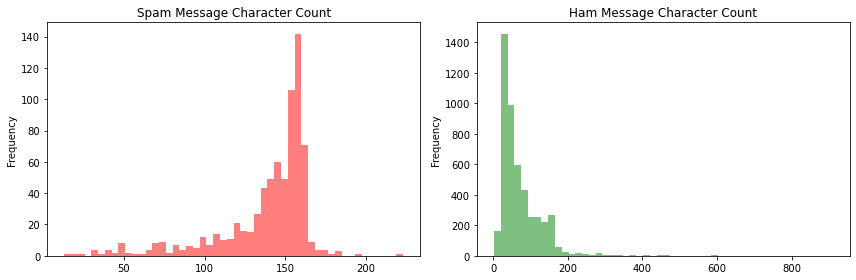

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

spam_data['v2'].apply(len).plot.hist(ax=axes[0], bins=50, alpha=0.5, color='red')
axes[0].set_title('Spam Message Character Count')

ham_data['v2'].apply(len).plot.hist(ax=axes[1], bins=50, alpha=0.5, color='green')
axes[1].set_title('Ham Message Character Count')

plt.tight_layout()
plt.show()

In [52]:
df.word_count.describe()

count    5572.000000
mean       80.058327
std        59.623937
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: word_count, dtype: float64

### Text Preprocessing

In [54]:
import string
from nltk.corpus import stopwords

In [55]:
def Mes_process(v2):
    no_punctuation =[char for char in v2 if char not in string.punctuation]
    no_punctuation=''.join(no_punctuation)

    return[word for word in no_punctuation.split() if word.lower()not in stopwords.words('english')]

In [56]:
output= Mes_process(v2=v2)

NameError: name 'v2' is not defined